# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

'''
Justin Bois has a python library with the helper functions from the
DataCamp courses Statistical Thinking in Python 1 & 2 
https://github.com/justinbois/dc_stat_think
'''
# !pip install dc_stat_think
import dc_stat_think as dcst

%matplotlib inline

## 1. Is the distribution of body temperature normal?

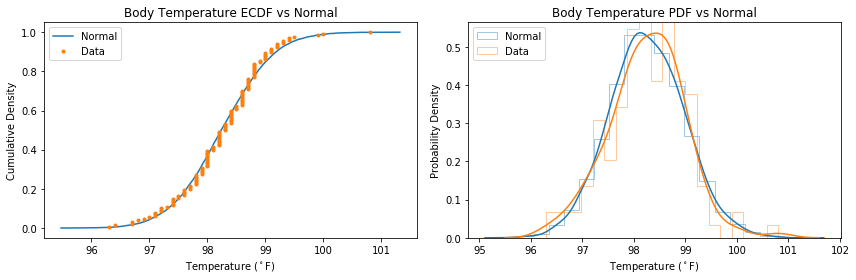

In [3]:
# get the mean and standard deviation of temperature
temp_mean = df['temperature'].mean()
temp_std = df['temperature'].std()
# draw 10000 samples from normal distribution
norm_sample = np.random.normal(temp_mean, temp_std, size=10000)
# compute the ECDF of normal sample and temperature data
x_norm, y_norm = dcst.ecdf(norm_sample)
x_temp, y_temp = dcst.ecdf(df['temperature'])
# plot the ecdf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
_ = axes[0].plot(x_norm, y_norm, label='Normal')
_ = axes[0].plot(x_temp, y_temp, marker='.', linestyle='none', label='Data')
_ = axes[0].set(xlabel='Temperature ($^\circ$F)',
           ylabel='Cumulative Density',
           title='Body Temperature ECDF vs Normal')
_ = axes[0].legend()
# plot the pdf
_ = sns.distplot(norm_sample, norm_hist=True, hist_kws={'histtype': 'step'}, 
                 ax=axes[1], bins=20, label='Normal')
_ = sns.distplot(df['temperature'], norm_hist=True, hist_kws={'histtype': 'step'}, 
                 ax=axes[1], bins=20, label='Data')
_ = axes[1].set(xlabel='Temperature ($^\circ$F)', 
                ylabel='Probability Density',
                title='Body Temperature PDF vs Normal')
_ = axes[1].legend()

fig.tight_layout()

In [4]:
print('Normal Distribution\n  kurtosis: {:.5f}, skew: {:.5f}'
      .format(stats.kurtosis(norm_sample), stats.skew(norm_sample)))
print('Temperature Data\n  kurtosis: {:.5f}, skew: {:.5f}'
      .format(stats.kurtosis(df['temperature']), stats.skew(df['temperature'])))

Normal Distribution
  kurtosis: 0.08389, skew: 0.06037
Temperature Data
  kurtosis: 0.70496, skew: -0.00437


The temperature data is very close to normally distributed although it exhibits slightly higher kurtosis (kurtosis of normal distribution should be close to zero). This means the temperature data is a bit more heavy-tailed than the normal distribution, although the difference is negligible.

## 2. Is the sample size large? Are the observations independent?

In [5]:
print('n = {}'.format(len(df)))

n = 130


A central limit theorum (CLT) rule of thumb is that a large sample size is n > 30. In this case n = 130 so the sample size would be considered large in the CLT context.

It can be assumed that one person's body temperature does not affect another person's body temperature, so the observations are indeed independent.

## 3. Is the true population mean really 98.6$^\circ$ F? 

### a. Would you use a one-sample or two-sample test? Why?
Since we are testing a single dataset vs a single value, the one-sample test is more appropriate.

### b. In this situation, is it appropriate to use the $t$ or $z$ statistic?
Since the population standard deviation of body temperatures is not known, the $t$ statistic is the appropriate method for this hypothesis test.

* The null hypothesis is that the true population mean of body temperature is equal to 98.6$^\circ$ F
* The alternative hypothesis is that the true population mean of body temperature is not equal to 98.6$^\circ$ F

In [93]:
# create lambda functions to calculate the t and z statistics
t_stat = lambda data, mu=98.6: \
(np.mean(data) - mu) / (np.std(data) / np.sqrt(len(data)))

z_stat = lambda data, mu=98.6, sigma=temp_std: \
(np.mean(data) - mu) / (sigma / np.sqrt(len(data)))

In [94]:
mu = 98.6
# get the t-statistic for the observation data
t_temp = t_stat(df['temperature'])
# shift the original data to have a mean of 98.6
temp_shifted = df['temperature'] - temp_mean + mu
# simulate null hypothesis by bootstrapping data and calculating t-statistic
t_temp_bs = dcst.draw_bs_reps(temp_shifted, t_stat, size=10000)
# now calculate the p-value of the bootstrapped t-statistics
# using np.abs() for two-tailed test
p_t_bs = np.sum(np.abs(t_temp_bs) >= np.abs(t_temp)) / len(t_temp_bs)
# print the results
print('Observed Temperature t-statistic: {:.4f}'.format(t_temp))
print('p-value of bootstrap test: {}'.format(p_t_bs))

Observed Temperature t-statistic: -5.4759
p-value of bootstrap test: 0.0


The p-value for the null hypothesis test is exactly zero, which means that out of 10,000 bootstrapped samples from the shifted data, not one had a mean as extreme as our observation mean. In this case we can reject the null hypothesis that the true population mean is equal to 98.6.

### c. Now try using the other test. How is the result different? Why?

In [95]:
# get the z-statistic for the observation data
z_temp = z_stat(df['temperature'])
# simulate the null hypothesis by bootsrapping data and calculating z-statistic
z_temp_bs = dcst.draw_bs_reps(temp_shifted, z_stat, size=10000)
# now calculate the p-value of the bootstrapped z-statistics
p_z_bs = np.sum(np.abs(z_temp_bs) >= np.abs(z_temp)) / len(z_temp_bs)
# print the results
print('Observed Temperature z-statistic: {:.4f}'.format(z_temp))
print('p-value of bootstrap test: {}'.format(p_z_bs))

Observed Temperature z-statistic: -5.4548
p-value of bootstrap test: 0.0


The p-value for the z-statistic null hypothesis test are essentially identical to that of the t-statistic null hypothesis test conducted above. This is not surprising for two reasons. First, since the population standard deviation is not known, we must use the sample standard deviation as an estimate of the population standard deviation. Second, the number of observations is large, and as the number of observations increases, the t-statistic asymptotically approaches the z-statistic. 

## 4. Draw a small sample of size 10 from the data and repeat both tests. 

In [96]:
# set a seed for numpy random so results are always the same
np.random.seed(42)
# take a random sample of size 10 from the observations
temp_sample = np.random.choice(df['temperature'], size=10)
# recreate the z-stat lambda function using the new standard deviation of sample
z_stat = lambda data, mu=98.6, sigma=temp_sample.std(): (np.mean(data) - mu) / (sigma / np.sqrt(len(data)))
# shift the sample data to have a mean of 98.6
temp_sample_shifted = temp_sample - temp_sample.mean() + mu
# perform the bootstrap test for the t-statistic
t_temp_sample = t_stat(temp_sample)
t_temp_sample_bs = dcst.draw_bs_reps(temp_sample_shifted, t_stat, size=10000)
p_t_temp_sample = np.sum(np.abs(t_temp_sample_bs) <= t_temp_sample) / len(t_temp_sample_bs)
# perform the bootstrap test for the z-statistic
z_temp_sample = z_stat(temp_sample)
z_temp_sample_bs = dcst.draw_bs_reps(temp_sample_shifted, z_stat, size=10000)
p_z_temp_sample = np.sum(np.abs(z_temp_sample_bs) >= z_temp_sample) / len(z_temp_sample_bs)
# print the t-statistic bootstrap test results
print('Observed Temperature Sample t-statistic: {:.4f}'.format(t_temp_sample))
print('p-value of sample bootstrap test: {}\n'.format(p_t_temp_sample))
# print the z-statistic bootstrap test results
print('Observed Temperature Sample z-statistic: {:.4f}'.format(z_temp_sample))
print('p-value of sample bootstrap test: {}\n'.format(p_z_temp_sample))

Observed Temperature Sample t-statistic: -3.2608
p-value of sample bootstrap test: 0.0

Observed Temperature Sample z-statistic: -3.2608
p-value of sample bootstrap test: 1.0



### a. Which one is the correct one to use?
With a small number of observations and an unknown population standard deviation, the t-statistic would be the appropriate choice for hypothesis testing.

### b. What does this tell you about the difference in application of the $t$ and $z$ statistic?
The difference between the p-values of the $t$- and $z$- statistics would result in completely different outcomes where we would reject the null hypothesis using the $t$-statistic and we would fail to reject the null hypothesis using the $z$-statistic.

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [116]:
# first get the z-critical value
z_crit = stats.norm.ppf(q=0.975)
# next calculate the margin of error
mean_moe = z_crit * temp_std / np.sqrt(len(df))
# calculate the 95% mean confidence interval
mean_ci = list(np.percentile(df['temperature'], [2.5, 97.5]))
# now calculate the prediction margin of error (n=1)
pred_moe = z_crit * temp_std / np.sqrt(1)
# and prediction interval
pi = [temp_mean - pred_moe, temp_mean + pred_moe]
# print the results
print('Mean margin of error: {:.4f}'.format(mean_moe))
print('Mean 95% confidence interval: {:.4f} to {:.4f}'.format(mean_ci[0], mean_ci[1]))
print('95% prediction interval: {:.4f} to {:.4f}'.format(pi[0], pi[1]))

Mean margin of error: 0.1260
Mean 95% confidence interval: 96.7225 to 99.4775
95% prediction interval: 96.8122 to 99.6862


An observation that falls outside of the 95% prediction interval above would be considered abnormal.

## 6. Is there a significant difference between males and females in normla temperature?
* The null hypothesis is that the mean body temperatures of males and females is the same
* The alternative hypothesis is that the mean body temperatures of males and females are different

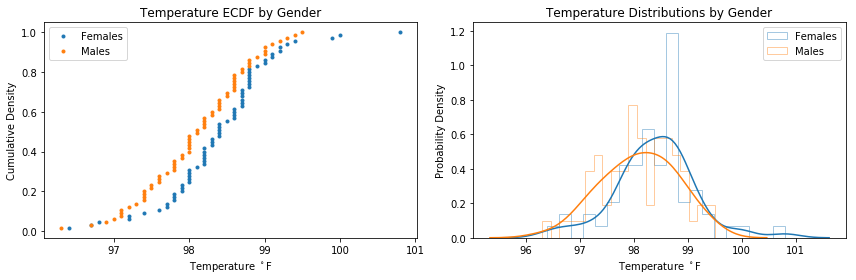

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# calculate the edcf for female and male temperatures
x_f, y_f = dcst.ecdf(df[df['gender'] == 'F']['temperature'])
x_m, y_m = dcst.ecdf(df[df['gender'] == 'M']['temperature'])
# plot the ecdf
_ = axes[0].plot(x_f, y_f, marker='.', linestyle='none', label='Females')
_ = axes[0].plot(x_m, y_m, marker='.', linestyle='none', label='Males')
_ = axes[0].set(xlabel='Temperature $^\circ$F', ylabel='Cumulative Density',
                title='Temperature ECDF by Gender')
_ = axes[0].legend()
# plot the distributions of each
_ = sns.distplot(df[df['gender'] == 'F']['temperature'], bins=20,
                 hist_kws={'histtype': 'step'}, ax=axes[1], label='Females')
_ = sns.distplot(df[df['gender'] == 'M']['temperature'], bins=20,
                 hist_kws={'histtype': 'step'}, ax=axes[1], label='Males')
_ = axes[1].set(xlabel='Temperature $^\circ$F', ylabel='Probability Density',
                title='Temperature Distributions by Gender')
_ = axes[1].legend()

fig.tight_layout()

In [147]:
# get the difference in means
mean_diff = dcst.diff_of_means(df[df['gender'] == 'F']['temperature'], 
                               df[df['gender'] == 'M']['temperature'])
# do a two sample t-test on the body temperature mean of males and females
p_m_f = stats.ttest_ind(df[df['gender'] == 'F']['temperature'], 
                        df[df['gender'] == 'M']['temperature']).pvalue
# print results
print('Difference between observed body temperature means of males '
      'and females: {:.4f}'.format(mean_diff))
print('p-value of two sample t-test: {:.4f}'.format(p_m_f))

Difference between observed body temperature means of males and females: 0.2892
p-value of two sample t-test: 0.0239


Observing the very low p-value results of the two sample t-test as well as the visual differences between the ECDF and probability distributions of each gender's body temperature, we can reject the null hypothesis that males and females have the same mean body temperature.

Although the longstanding belief that the mean body temperatures of humans is 98.6$^\circ$F, my analysis shows that this value is not statistically accurate. In fact, according the sample data analyzed herein, the mean is actually 98.25 $\pm$ 0.13$^\circ$F. Additionally, there is significant statistical evidence that the mean body temperatures of males and females is not equal, with males having lower mean body temperature than females.

One caveat to mention is that more investigation into the sample data would be necessary to rule out any sampling bias, which would skew the results of this analysis.